## **Avellaneda-Stoikov Market-Making Implementations Comparison**

The Avellaneda-Stoikov model for market-making allows to provide liquidity optimally while managing inventory risk through the notion of reservations prices and computing the optimal bid-ask spread each time, depending on the inventory and other parameters. This model has become very famous given its application to a high-frequency trading setting, and many extensions and implementations have been derived for its practical usage.

The aim of this notebook project is to program and simulate two different versions of the Avellaneda-Stoikov model in order to have a numerical and graphical comparison and to study the effect of the different parameters. Specifically, we will look at the following implementations:

- The Avellaneda-Stoikov Original Model
- The Avellaneda-Stoikov Model with a Risk Limit

For these implementations there will be graphical representations and summary tables with relevant numerical results.

#### **Necessary Libraries \& Data**

First of all, we download the necessary Python libraries that will be used throughout the code.

In [1]:
from classes import *
from utils import *

#### **Choose the parameters for the simulations and backtests**

These parameters can be estimated from the data or can be defined by the user. They are applied to all the Avellaneda-Stoikov bots used in the code, so that results can be compared.

In [2]:
gamma = 0.1
k = 1.5
A = 140
Q = 12
sigma = 5
T = 1
M = 25000
S0 = 100
trad_fee = 0.002
init_cash = 1000
target = 10
rf = 0.0325

In [3]:
random.seed(2147483648)

#### **The Avellaneda-Stoikov Original Model**

This is the original Avellaneda-Stoikov model, as defined by Avellaneda and Stoikov (2008). The most important aspects of the modell are the following:

1. Let $(\Omega, \mathcal{F}, \mathbb{P})$ be the probability space where all variables are defined and $(\mathcal{F})_{t \geq 0}$ to be a filtration with the usual conditions. The stock prices $S$ evolves respecting the diffusion process $$dS_t = \sigma dW_t$$ where $W$ is a brownian motion and $\sigma$ is the volatility parameter for the prices.

2. The inventory of the market-maker is $$q_t=N^{b}_t-N^{a}_t$$ where $N^b$ and $N^{a}$ are the point processes independent of $(W_t)_{t \geq 0}$ which give the number of bought and sold assets, respectively.

3. Arrival rates of these processes depend on $S_t^{a}$ and $S_t^{b}$ and intensities $\lambda^{a}$ and $\lambda^{b}$ associted respectively with $N^{a}$ and $N^{b}$ depend on the difference between quoted and midpoint prices $\delta^{a}=S_t^{a}-S_t$ and $\delta^{b}=S_t-S_t^{b}$ with the form
$$
\lambda^{i} (\delta^{i}) = A\exp{(-k \delta^{i})}\quad\text{for }i\in\{1,2\}
$$

4. The cash of the market-maker evolves according to $$dX_t = (S_t+\delta^{a})dN^{a}_t-(S_t-\delta^{b})dN^{b}_t$$ where $X$ is the amount of cash.

5. The agent's objective function is the CARA utility function $v(x,s,q)=E_t[-\exp(-\gamma(x_T+ q_T s_T))]$, so that the optimization problem is $$\sup_{(\delta^{a}_t)_t,(\delta^{b}_t)_t \in \mathcal{A}}{E_t[-\exp(-\gamma(x_T+ q_T s_T))]}$$ where $\mathcal{A}$ is the set of predictable processes bounded from below and $\gamma$ is the risk aversion coefficient.

The numerical simulation results of this model yields the following:

In [4]:
ASBot = AveStoikovOriginal(gamma=gamma,sigma=sigma,k=k,T=T,M=M)
Simulator = SingleBotSimulator(bot=ASBot,k=k,A=A,sigma=sigma,T=T,M=M,S0=S0)

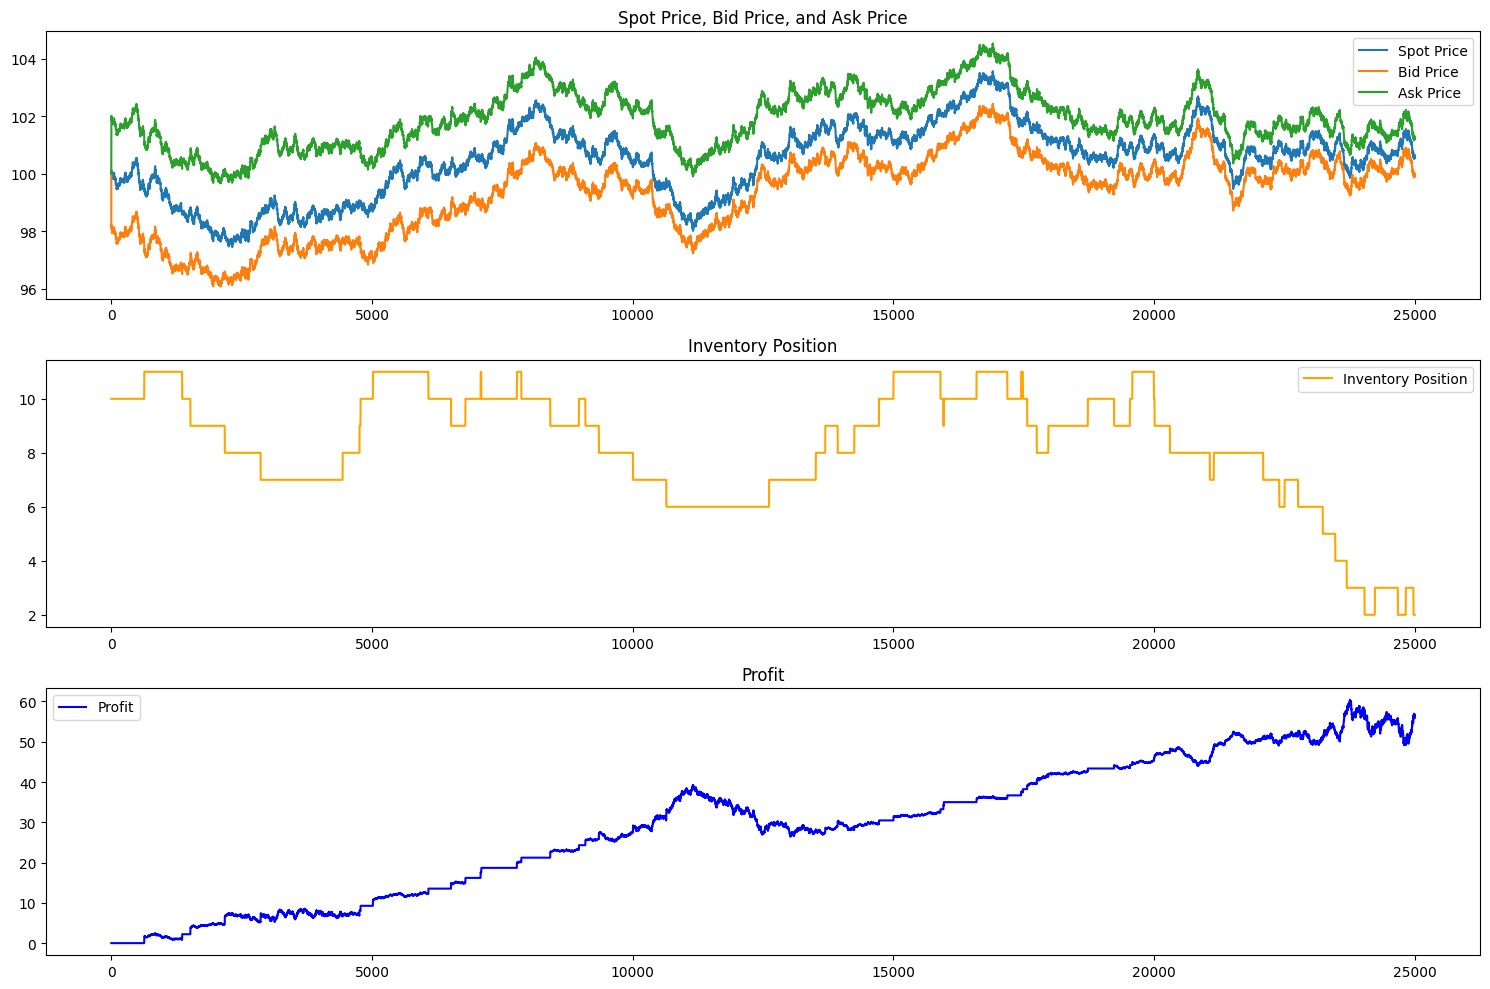

In [5]:
res_sim = Simulator.trade_sim(mod=Bots.Original,target=target,init_cash=init_cash,trad_fee=trad_fee)
single_sim(res=res_sim,rf=rf)

In [6]:
compute_metrics_single(res=res_sim,rf=rf)


Simulation metrics:

- Average Spread : 2.5406187979995014

- Average Inventory Held : 8.324707011719532

- Max Inventory Held : 11.0

- Generated Profit : 55.94940498157189

- Profit Standard Deviation : 16.40580615232479

- Sharpe Ratio : 2.3581208349333793

- Downside Deviation : 0.005430152017710042

- Sortino Ratio : 5.791574899590202


OTRO

In [7]:
ASBot2 = AveStoikovRisk(gamma=gamma,sigma=sigma,k=k,A=A,T=T,M=M,Q=12)
Simulator2 = SingleBotSimulator(bot=ASBot2,k=k,A=A,sigma=sigma,T=T,M=M,S0=S0)

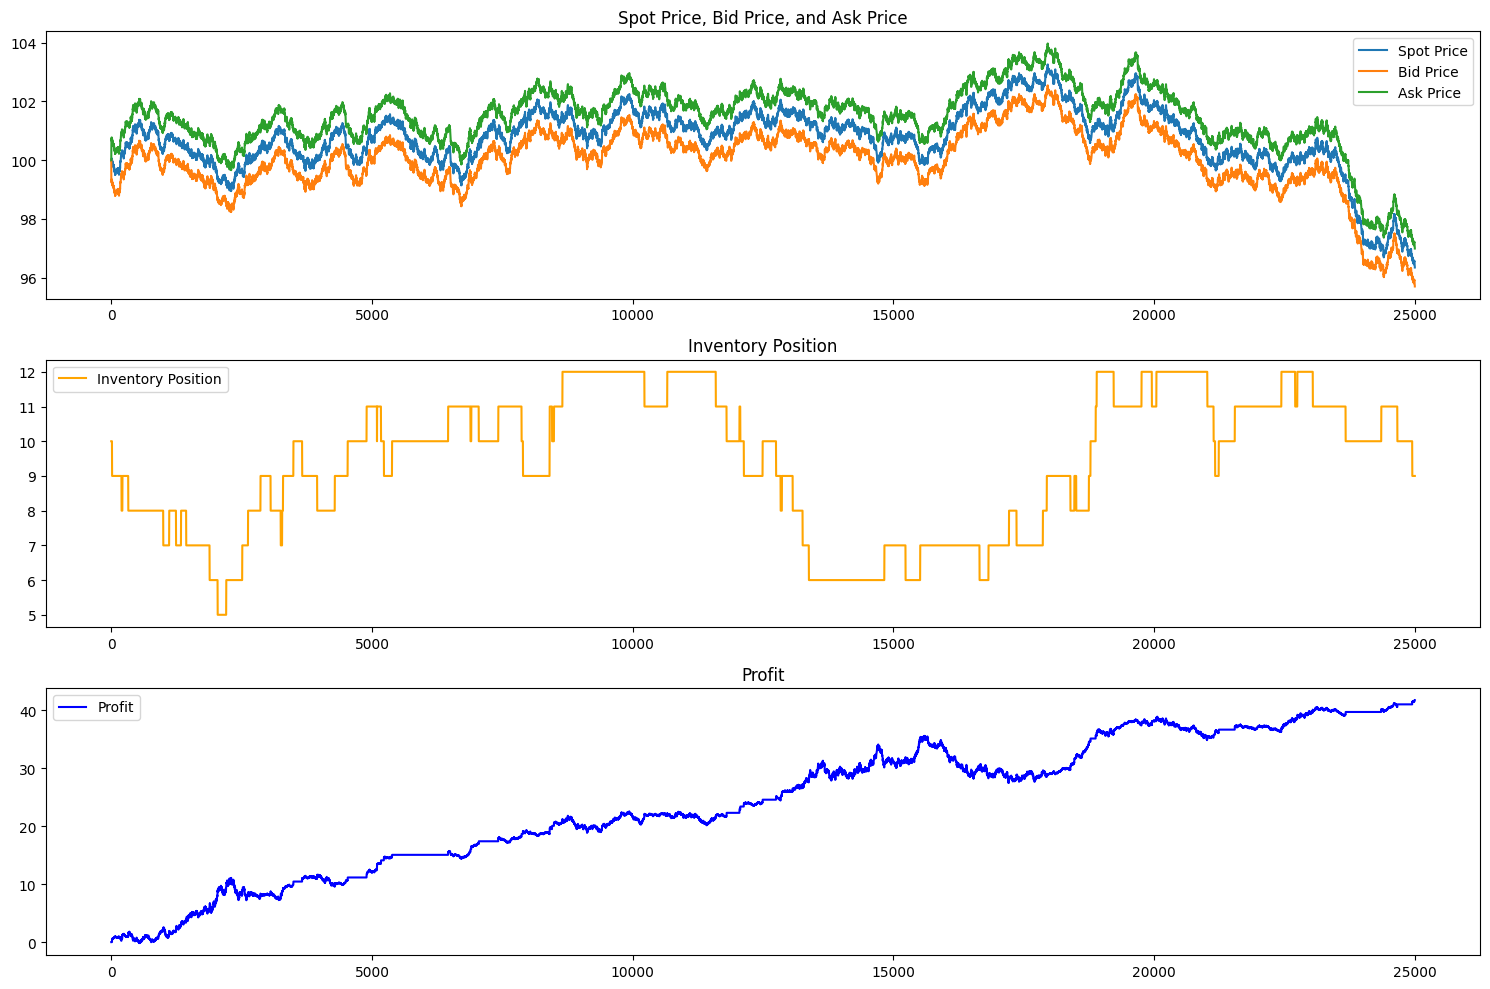

In [8]:
res_sim2 = Simulator2.trade_sim(mod=Bots.Limit,target=target,init_cash=init_cash,trad_fee=trad_fee)
single_sim(res=res_sim2,rf=rf)

In [9]:
compute_metrics_single(res=res_sim2,rf=rf)


Simulation metrics:

- Average Spread : 1.419924115845711

- Average Inventory Held : 9.418783248670053

- Max Inventory Held : 12.0

- Generated Profit : 41.72132610886402

- Profit Standard Deviation : 11.497717000307517

- Sharpe Ratio : 0.623482473262722

- Downside Deviation : 0.14510955195632289

- Sortino Ratio : 1.802590080921221


SYMMETRIC

In [10]:
SymmBot = Symm(spread=0.02)
Simulator3 = SingleBotSimulator(bot=SymmBot,k=k,A=A,sigma=sigma,T=T,M=M,S0=S0)

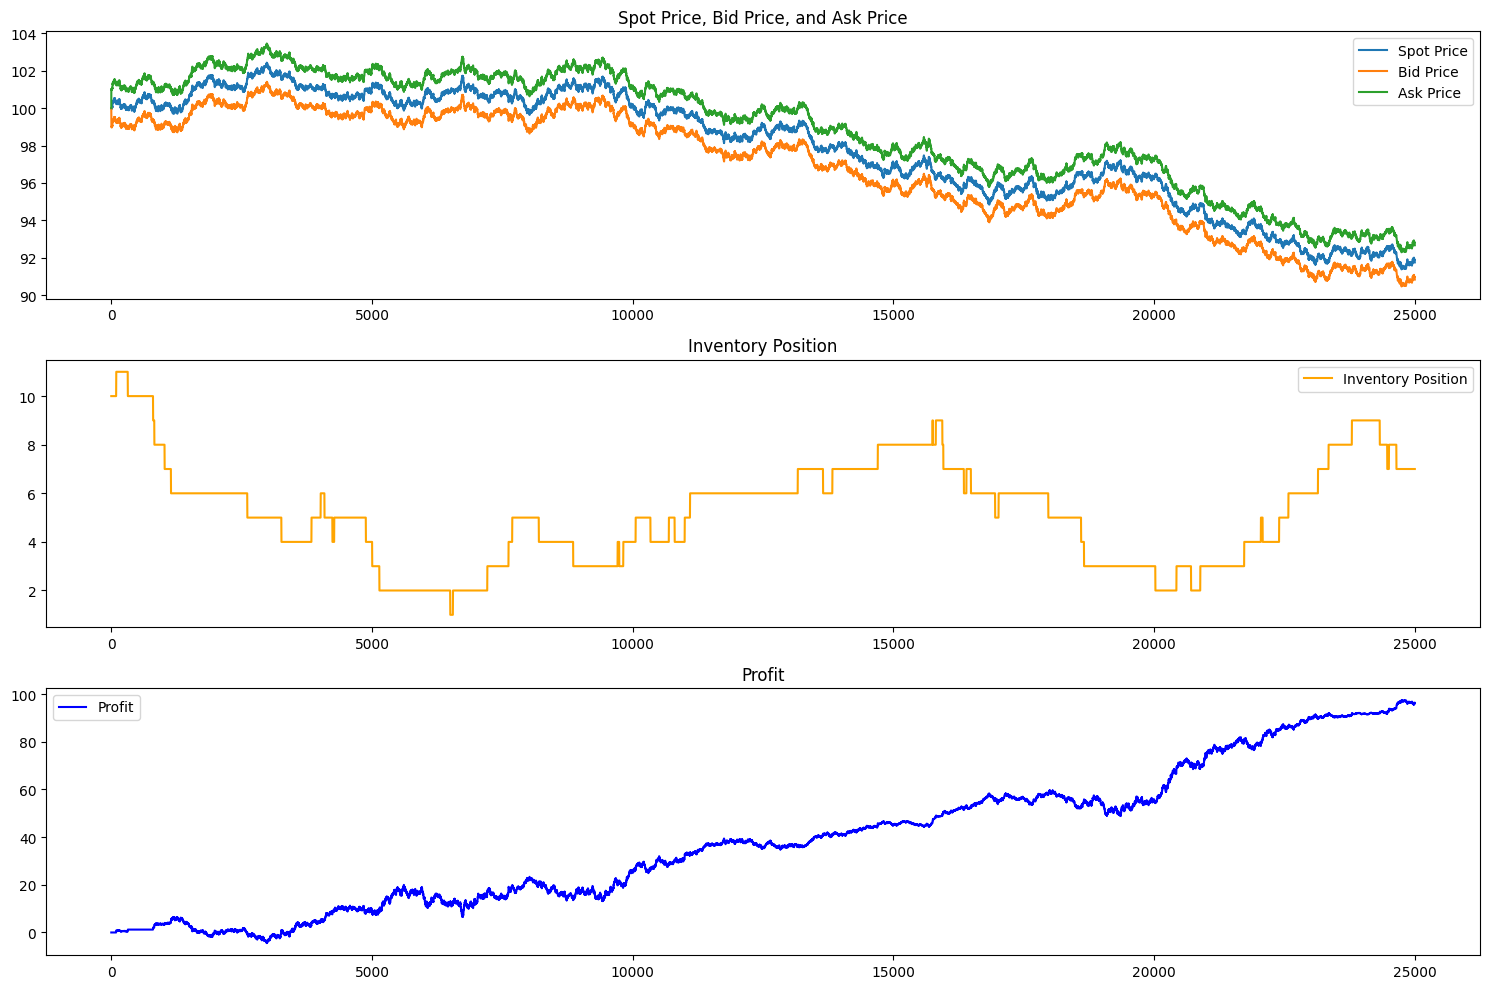

In [11]:
res_sim3 = Simulator3.trade_sim(mod=Bots.Symm,target=target,init_cash=init_cash,trad_fee=trad_fee)
single_sim(res=res_sim3,rf=rf)

In [12]:
compute_metrics_single(res=res_sim3,rf=rf)


Simulation metrics:

- Average Spread : 1.958312222627882

- Average Inventory Held : 5.206551737930483

- Max Inventory Held : 11.0

- Generated Profit : 96.36950979346034

- Profit Standard Deviation : 28.81091725833524

- Sharpe Ratio : -1.329418807189475

- Downside Deviation : 3.460924837881963

- Sortino Ratio : -0.9492638694632695


**Comparisons**

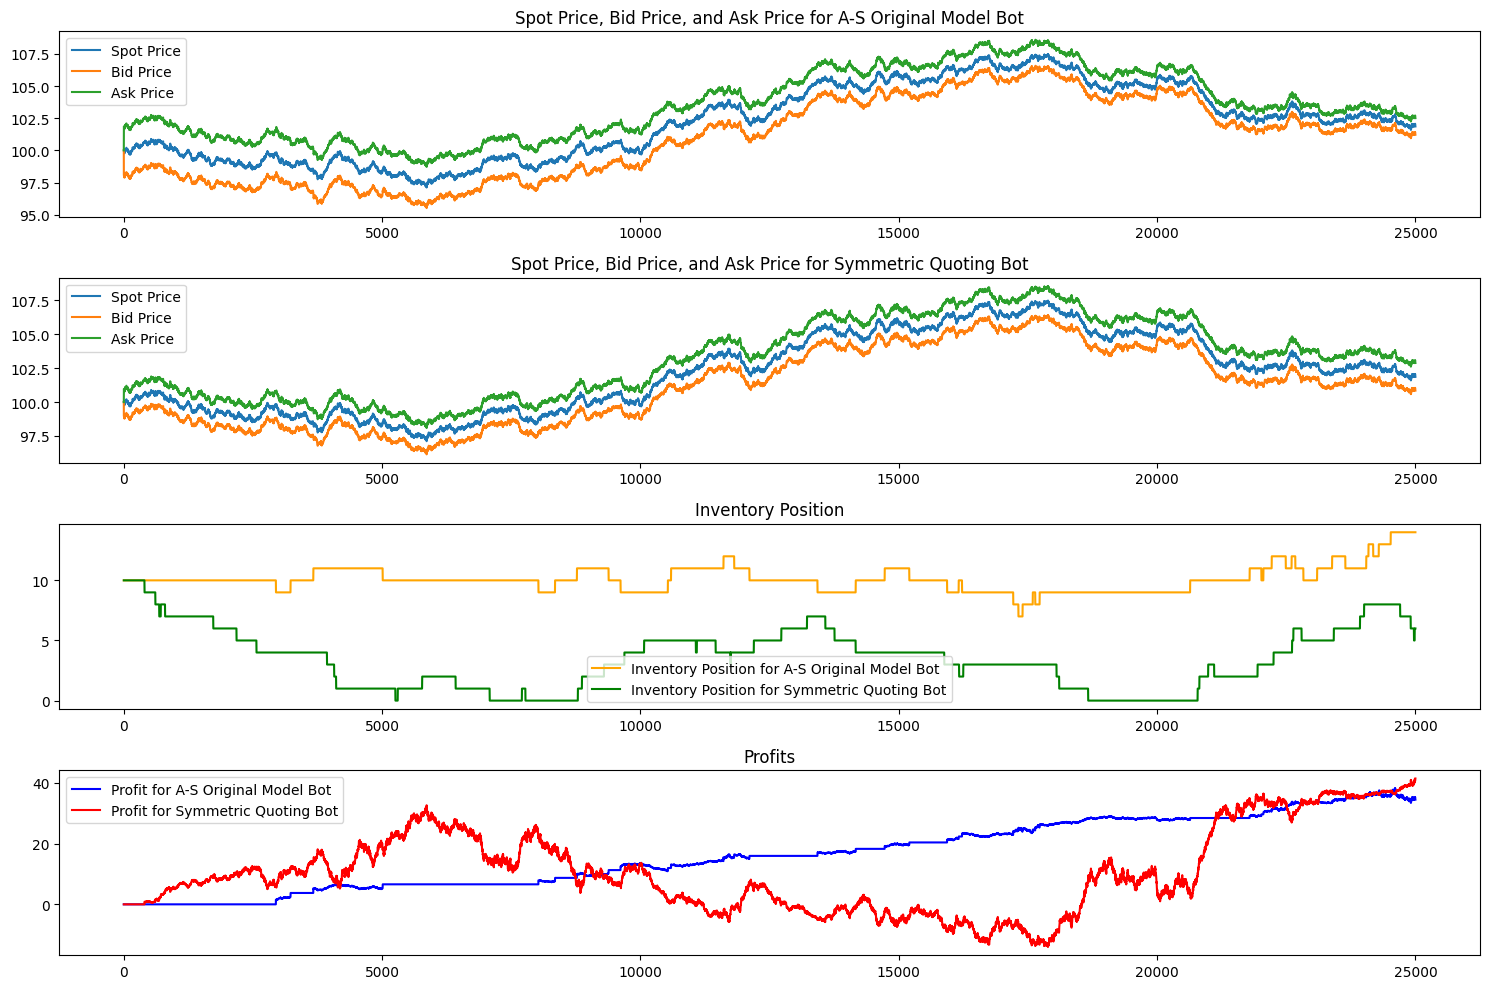

In [13]:
JointSimulator = JointBotSimulator(bot1=ASBot,bot2=SymmBot,k=k,A=A,sigma=sigma,T=T,M=M,S0=S0)
res_joint_sim = JointSimulator.trade_sim(mod1=Bots.Original,mod2=Bots.Symm,target=target,init_cash=init_cash,trad_fee=trad_fee)
res_bot, res_other = res_joint_sim["Bot1"], res_joint_sim["Bot2"]
comparative_sim(bot1=Bots.Original,bot2=Bots.Symm,res1=res_bot,res2=res_other,rf=rf)

In [14]:
compute_metrics_joint(rf=rf,bot1=Bots.Original,res1=res_bot,bot2=Bots.Symm,res2=res_other)


Simulation metrics:

- Average Spread for A-S Original Model Bot : 2.5406187979995014

- Average Spread for Symmetric Quoting Bot : 2.0441093476515615



- Average Inventory Held for A-S Original Model Bot : 10.098116075356986

- Average Inventory Held for Symmetric Quoting Bot : 3.4774209031638734



- Max Inventory Held for A-S Original Model Bot : 14.0

- Max Inventory Held for Symmetric Quoting Bot : 10.0



- Generated Profit for A-S Original Model Bot : 34.50543188713891

- Generated Profit for Symmetric Quoting Bot : 41.45870124608393



- Profit Standard Deviation for A-S Original Model Bot : 11.15588099679

- Profit Standard Deviation for Symmetric Quoting Bot : 13.774661386980934



- Sharpe Ratio for A-S Original Model Bot : 3.7719097450929127

- Sharpe Ratio for Symmetric Quoting Bot : -1.0844559545121373



- Downside Deviation for A-S Original Model Bot : 0.0021062975412281266

- Downside Deviation for Symmetric Quoting Bot : 2.3778755561696228



- Sortino Ratio for A-S

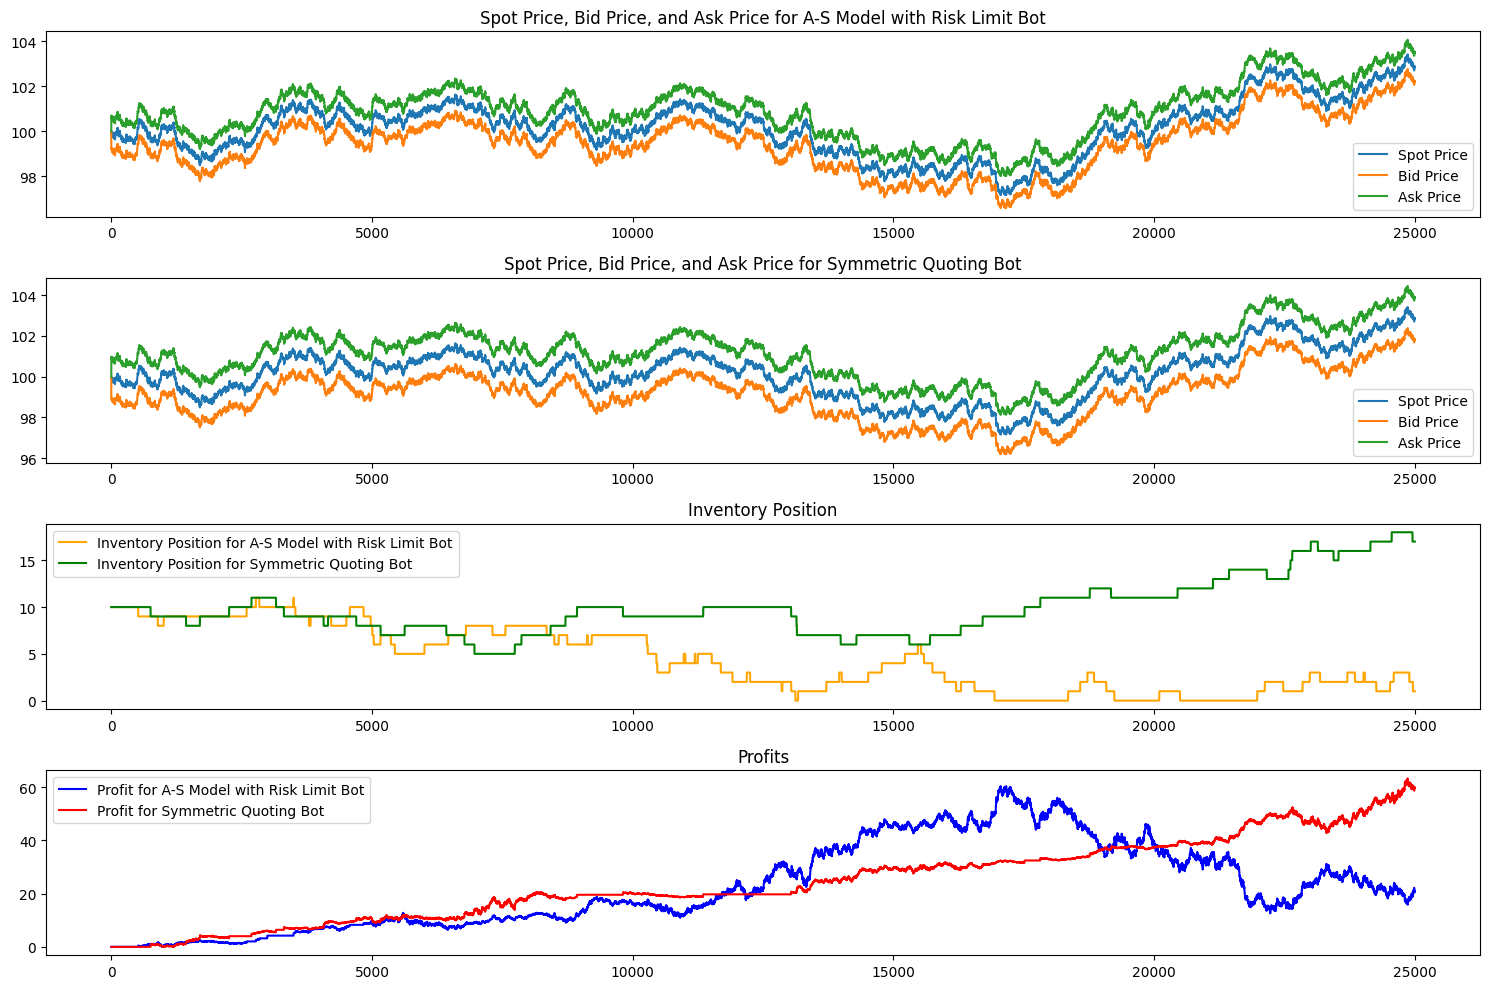

In [15]:
JointSimulator2 = JointBotSimulator(bot1=ASBot2,bot2=SymmBot,k=k,A=A,sigma=sigma,T=T,M=M,S0=S0)
res_joint_sim2 = JointSimulator2.trade_sim(mod1=Bots.Limit,mod2=Bots.Symm,target=target,init_cash=init_cash,trad_fee=trad_fee)
res_bot2, res_other2 = res_joint_sim2["Bot1"], res_joint_sim2["Bot2"]
comparative_sim(bot1=Bots.Limit,bot2=Bots.Symm,res1=res_bot2,res2=res_other2,rf=rf)

In [16]:
compute_metrics_joint(rf=rf,bot1=Bots.Limit,res1=res_bot2,bot2=Bots.Symm,res2=res_other2)


Simulation metrics:

- Average Spread for A-S Model with Risk Limit Bot : 1.4198135592418457

- Average Spread for Symmetric Quoting Bot : 2.0027886920326123



- Average Inventory Held for A-S Model with Risk Limit Bot : 4.336186552537899

- Average Inventory Held for Symmetric Quoting Bot : 9.857005719771209



- Max Inventory Held for A-S Model with Risk Limit Bot : 11.0

- Max Inventory Held for Symmetric Quoting Bot : 18.0



- Generated Profit for A-S Model with Risk Limit Bot : 20.66575803802641

- Generated Profit for Symmetric Quoting Bot : 59.916193025992584



- Profit Standard Deviation for A-S Model with Risk Limit Bot : 16.139124500622863

- Profit Standard Deviation for Symmetric Quoting Bot : 15.043506126486268



- Sharpe Ratio for A-S Model with Risk Limit Bot : 2.508257174118005

- Sharpe Ratio for Symmetric Quoting Bot : 2.8023732786914493



- Downside Deviation for A-S Model with Risk Limit Bot : 0.01782981105305456

- Downside Deviation for Symmetric Quoting Bot

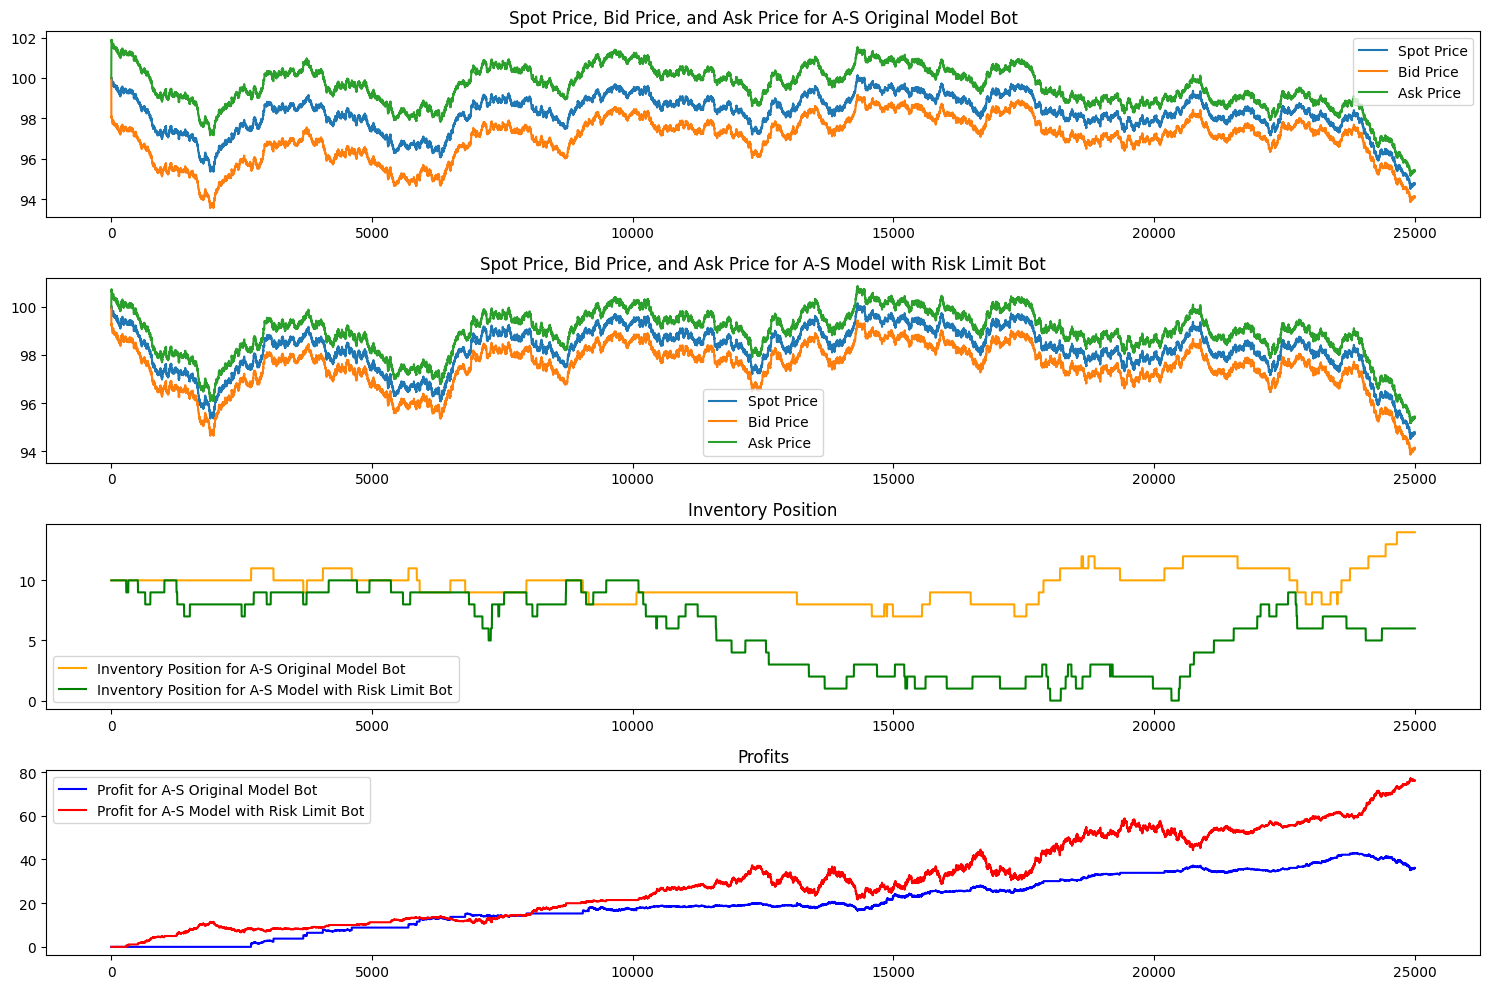

In [17]:
JointSimulator3 = JointBotSimulator(bot1=ASBot,bot2=ASBot2,k=k,A=A,sigma=sigma,T=T,M=M,S0=S0)
res_joint_sim3 = JointSimulator3.trade_sim(mod1=Bots.Original,mod2=Bots.Limit,target=target,init_cash=init_cash,trad_fee=trad_fee)
res_bot3, res_other3 = res_joint_sim3["Bot1"], res_joint_sim3["Bot2"]
comparative_sim(bot1=Bots.Original,bot2=Bots.Limit,res1=res_bot3,res2=res_other3,rf=rf)

In [18]:
compute_metrics_joint(rf=rf,bot1=Bots.Original,res1=res_bot3,bot2=Bots.Limit,res2=res_other3)


Simulation metrics:

- Average Spread for A-S Original Model Bot : 2.5406187979995014

- Average Spread for A-S Model with Risk Limit Bot : 1.419913864067029



- Average Inventory Held for A-S Original Model Bot : 9.652133914643414

- Average Inventory Held for A-S Model with Risk Limit Bot : 5.836046558137674



- Max Inventory Held for A-S Original Model Bot : 14.0

- Max Inventory Held for A-S Model with Risk Limit Bot : 10.0



- Generated Profit for A-S Original Model Bot : 36.172086125075225

- Generated Profit for A-S Model with Risk Limit Bot : 76.0006591977517



- Profit Standard Deviation for A-S Original Model Bot : 12.243444275444546

- Profit Standard Deviation for A-S Model with Risk Limit Bot : 19.112959017131114



- Sharpe Ratio for A-S Original Model Bot : 3.5893601318643076

- Sharpe Ratio for A-S Model with Risk Limit Bot : 4.1123168505221



- Downside Deviation for A-S Original Model Bot : 0.0025051894731275923

- Downside Deviation for A-S Model with Risk Limi